In [81]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [4]:
shop_data = pd.read_csv(r'C:\Users\blync\Downloads\SHOP.csv')

In [5]:
shop_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-03,321.010010,351.309998,320.00000,350.660004,350.660004,3269800
1,2019-12-04,350.000000,376.910004,349.51001,372.000000,372.000000,5600800
2,2019-12-05,371.029999,376.589996,360.26001,363.589996,363.589996,3242200
3,2019-12-06,367.799988,372.290009,360.75000,364.600006,364.600006,2198700
4,2019-12-09,365.179993,381.109985,364.00000,369.790009,369.790009,4074600


Text(0, 0.5, 'Closing Price')

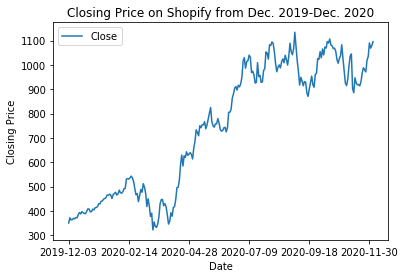

In [7]:
shop_data.plot(x='Date', y='Close', kind='line')
plt.title('Closing Price on Shopify from Dec. 2019-Dec. 2020')
plt.xlabel('Date')
plt.ylabel('Closing Price')

In [29]:
# Moving Averages
twenty_ma = shop_data.Close.rolling(window=20).mean()
fifty_ma = shop_data.Close.rolling(window=50).mean()
twohund_ma = shop_data.Close.rolling(window=200).mean()

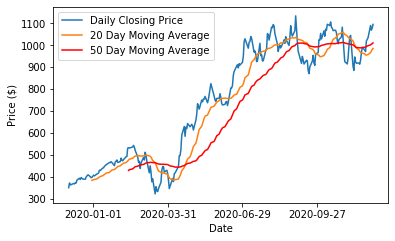

In [61]:
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in shop_data.Date]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=90))
plt.gcf().autofmt_xdate()
plt.plot(x, shop_data.Close, label='Daily Closing Price')
plt.plot(x, twenty_ma, label='20 Day Moving Average')
plt.plot(x, fifty_ma, label='50 Day Moving Average', color='red')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.show()

In [8]:
shop_data['Percent Change'] = (shop_data['Close']-shop_data['Open'])/shop_data['Open']
shop_data

,Date,Open,High,Low,Close,Adj Close,Volume,Percent Change
0,2019-12-03,321.010010,351.309998,320.000000,350.660004,350.660004,3269800,0.092365
1,2019-12-04,350.000000,376.910004,349.510010,372.000000,372.000000,5600800,0.062857
2,2019-12-05,371.029999,376.589996,360.260010,363.589996,363.589996,3242200,-0.020052
3,2019-12-06,367.799988,372.290009,360.750000,364.600006,364.600006,2198700,-0.008700
4,2019-12-09,365.179993,381.109985,364.000000,369.790009,369.790009,4074600,0.012624
...,...,...,...,...,...,...,...,...
249,2020-11-27,1028.239990,1044.000000,1009.260010,1034.390015,1034.390015,1185400,0.005981
250,2020-11-30,1045.000000,1094.699951,1035.000000,1090.380005,1090.380005,2604900,0.043426
251,2020-12-01,1080.380005,1087.729980,1051.000000,1069.060059,1069.060059,1733500,-0.010478
252,2020-12-02,1051.000000,1083.369995,1036.010010,1079.439941,1079.439941,1250100,0.027060


Text(0, 0.5, 'Percent Change')

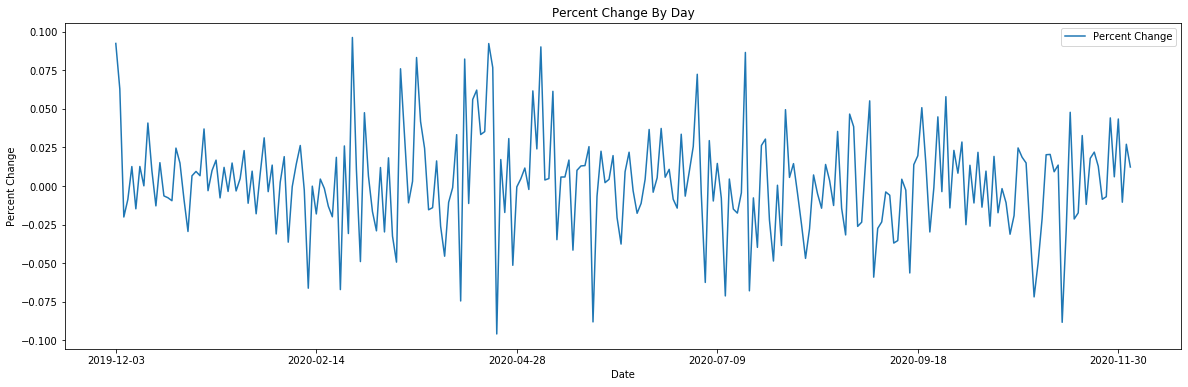

In [12]:
shop_data.plot(x='Date', y='Percent Change', kind='line', figsize=(20,6))
plt.title('Percent Change By Day')
plt.xlabel('Date')
plt.ylabel('Percent Change')

In [15]:
#Volume Price Trend (VPT) is an idicator often used to help predict the movement of a stock
shop_data['VPT']=0

In [16]:
for i in range(1,len(shop_data)):
    shop_data.loc[i,'VPT'] = shop_data.loc[i-1, 'VPT'] + shop_data.loc[i,'Volume'] * (shop_data.loc[i,'Close']-shop_data.loc[i-1,'Close'])/shop_data.loc[i-1,'Close']
shop_data

,Date,Open,High,Low,Close,Adj Close,Volume,Percent Change,VPT
0,2019-12-03,321.010010,351.309998,320.000000,350.660004,350.660004,3269800,0.092365,0.000000e+00
1,2019-12-04,350.000000,376.910004,349.510010,372.000000,372.000000,5600800,0.062857,3.408460e+05
2,2019-12-05,371.029999,376.589996,360.260010,363.589996,363.589996,3242200,-0.020052,2.675478e+05
3,2019-12-06,367.799988,372.290009,360.750000,364.600006,364.600006,2198700,-0.008700,2.736555e+05
4,2019-12-09,365.179993,381.109985,364.000000,369.790009,369.790009,4074600,0.012624,3.316566e+05
...,...,...,...,...,...,...,...,...,...
249,2020-11-27,1028.239990,1044.000000,1009.260010,1034.390015,1034.390015,1185400,0.005981,4.192523e+06
250,2020-11-30,1045.000000,1094.699951,1035.000000,1090.380005,1090.380005,2604900,0.043426,4.333522e+06
251,2020-12-01,1080.380005,1087.729980,1051.000000,1069.060059,1069.060059,1733500,-0.010478,4.299627e+06
252,2020-12-02,1051.000000,1083.369995,1036.010010,1079.439941,1079.439941,1250100,0.027060,4.311765e+06


Text(0, 0.5, 'VPT')

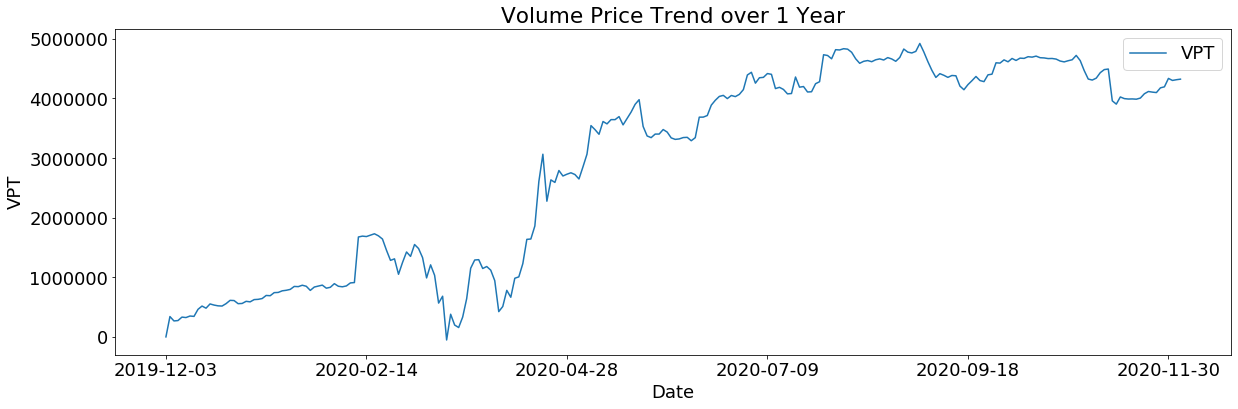

In [118]:
shop_data.plot(x='Date', y='VPT', kind='line',figsize=(20,6), logy=False)
plt.title('Volume Price Trend over 1 Year')
plt.xlabel('Date')
plt.ylabel('VPT')

Text(0, 0.5, 'VPT')

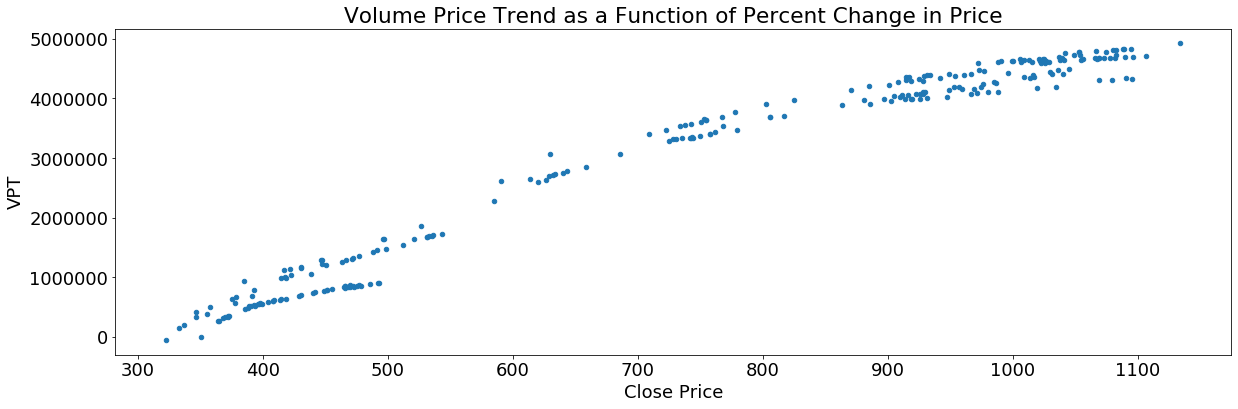

In [119]:
shop_data.plot(x='Close', y='VPT', kind='scatter',figsize=(20,6))
plt.title('Volume Price Trend as a Function of Percent Change in Price')
plt.xlabel('Close Price')
plt.ylabel('VPT')

In [120]:
VPT_Price = shop_data[['Close','VPT']]
VPT_Price2 = VPT_Price.sort_values(by=['Close'])
VPT_Price3 = VPT_Price2.reset_index(drop=True)
VPT_Price3

,Close,VPT
0,322.290009,-5.171960e+04
1,332.500000,1.569960e+05
2,336.829987,1.987391e+05
3,346.059998,3.321830e+05
4,346.299988,4.237116e+05
...,...,...
249,1094.650024,4.831623e+06
250,1095.329956,4.321014e+06
251,1096.000000,4.697553e+06
252,1106.589966,4.707380e+06


In [121]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

Mean absolute error: 435700.57
Residual sum of squares (MSE): 346235452762.42


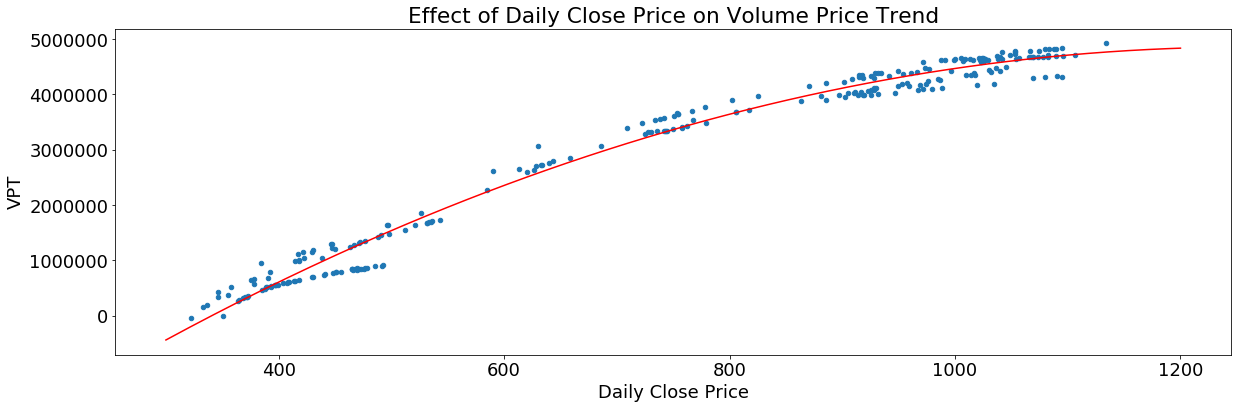

In [122]:
a = shop_data['Close']
b = shop_data['VPT']
x = np.linspace(300, 1200, 254)
fit = np.polyfit(a, b, 2)
p = np.poly1d(fit)
shop_data.plot(kind='scatter', x='Close', y = 'VPT', figsize=(20, 6))
plt.plot(x, p(x), color = 'red')
plt.title('Effect of Daily Close Price on Volume Price Trend')
plt.xlabel('Daily Close Price')
plt.ylabel('VPT')
mpl.rcParams.update({'font.size': 18})
print("Mean absolute error: %.2f" % np.mean(np.absolute(p(x) - b)))
print("Residual sum of squares (MSE): %.2f" % np.mean((p(x) - b) ** 2))

In [123]:
print('VPT = ' "{:.5f}".format(p[0]) + ' * x^2 + ' "{:.2f}".format(p[1]) + ' * x + ' "{:.2f}".format(p[2]) + ', where x is the Daily Close Price')

VPT = -4269877.62178 * x^2 + 14489.69 * x + -5.75, where x is the Daily Close Price


In [124]:
num = sum((b-p(x))**2)
meanofb = np.mean(b)
den = sum((b-meanofb)**2)
r2 = 1-num/den
print('r2 = ' + "{:.2f}".format(r2))

r2 = 0.87
